# Evaluation
This notebook contains code to produce the plots and visualisations necessary for Assignment 3.

In [1]:
from models import *
import pandas as pd
import numpy as np
import torch
from fashionmnist_utils.mnist_reader import load_mnist
import matplotlib.pyplot as plt
import seaborn as sns
from trainers import SKLearnTrainer
from trainers import PyTorchTrainer

/home/neutron/anaconda3/envs/iaml/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/neutron/anaconda3/envs/iaml/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/neutron/anaconda3/envs/iaml/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/neutron/anaconda3/envs

## Load models

In [2]:
models = {
    'LogisticRegression': SKLearnTrainer.load("models/LogisticRegression-04-17--12-55-26.pkl"),
    'SVM (Linear)': SKLearnTrainer.load("models/LinearSVC-04-17--12-56-26.pkl"),
    'SVM (polynomial)': SKLearnTrainer.load("models/SVC-04-17--13-00-57.pkl"),
    'KNN': SKLearnTrainer.load("models/KNeighborsClassifier-04-17--13-27-25.pkl"),
    'MLP_0': PyTorchTrainer.load("models/MLP_Net0-05-01--15-40-16.pkl"),
    'MLP_1': PyTorchTrainer.load("models/MLP_Net1-05-01--17-21-38.pkl"),
    'CNN_0': PyTorchTrainer.load("models/CNN_Net0-05-01--17-47-16.pkl"),
    'CNN_1': PyTorchTrainer.load("models/CNN_Net1-05-01--18-32-45.pkl"),
    'CNN_Net0_Req_Patience=3': PyTorchTrainer.load("models/CNN_Net_Regularisation(patience=3)-05-14--19-17-38.pkl")
}

## Perform evaluation
The following code evaluates each model loaded in `models`:

In [3]:
loggers = {k: v.evaluate() for k, v in models.items()} 

## Define classes for the dataset

In [4]:
classes = [
    't-shirt',
    'trouser',
    'pullover',
    'dress',
    'coat',
    'sandal',
    'shirt',
    'sneaker',
    'bag',
    'ankle boot'
]

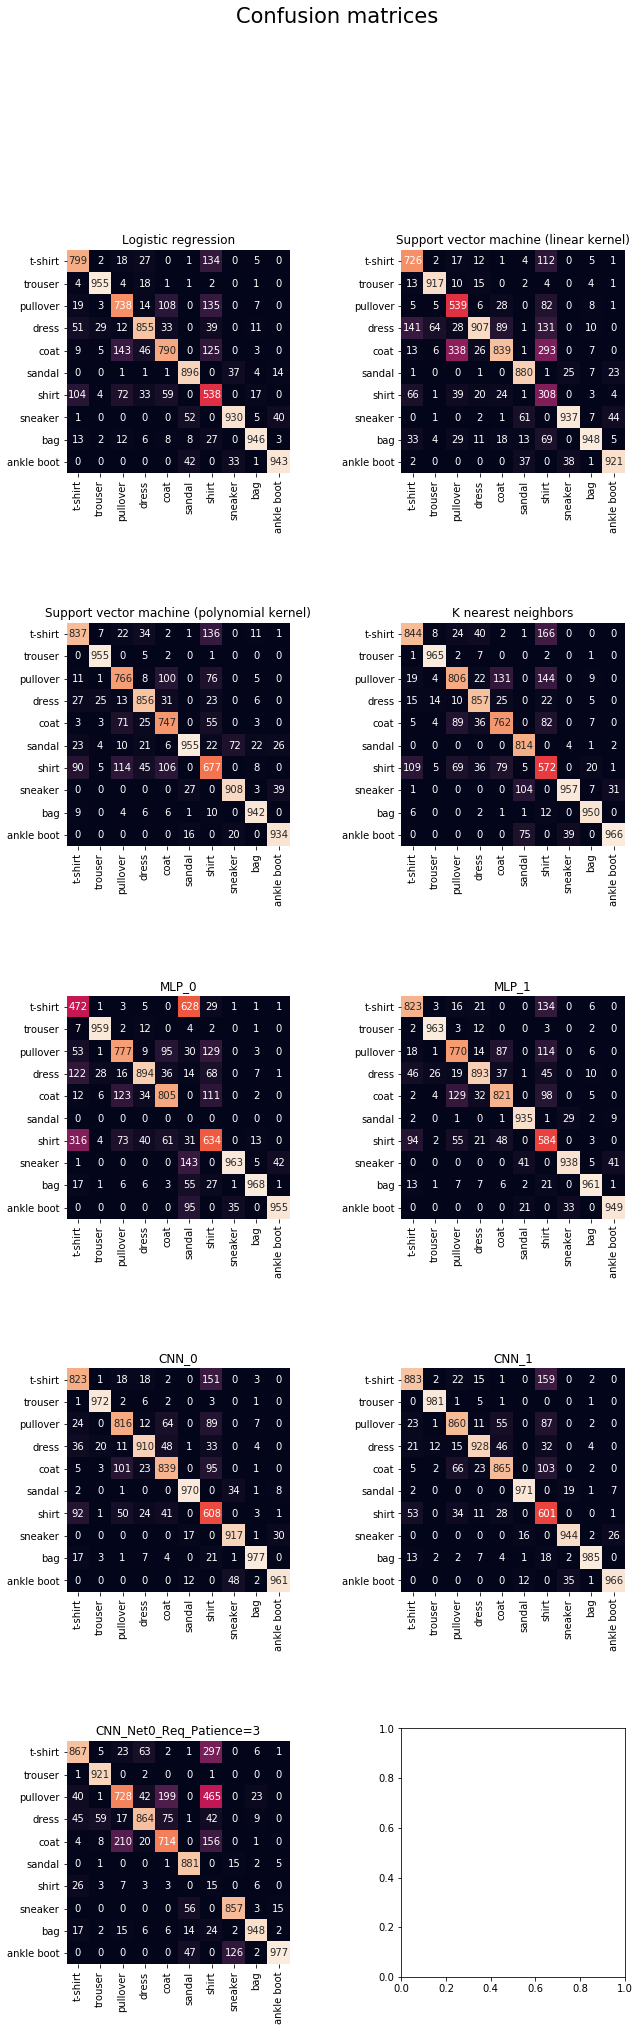

In [5]:
fig, ax = plt.subplots(5, 2, figsize=(10, 32))
fig.subplots_adjust(hspace = 0.5, wspace = 0.5)
fig.suptitle('Confusion matrices', fontsize='21')
ax[0,0].set_title("Logistic regression")
ax[0,1].set_title("Support vector machine (linear kernel)")
ax[1,0].set_title("Support vector machine (polynomial kernel)")
ax[1,1].set_title("K nearest neighbors")
ax[2,0].set_title("MLP_0")
ax[2,1].set_title("MLP_1")
ax[3,0].set_title("CNN_0")
ax[3,1].set_title("CNN_1")
ax[4,0].set_title("CNN_Net0_Req_Patience=3")


sns.heatmap(loggers['LogisticRegression'].mat, annot=True, fmt='.0f', cbar=False, xticklabels=classes, 
            yticklabels=classes, square=True, ax=ax[0,0])

sns.heatmap(loggers['SVM (Linear)'].mat, annot=True, fmt='.0f', cbar=False, xticklabels=classes, 
            yticklabels=classes, square=True, ax=ax[0,1])

sns.heatmap(loggers['SVM (polynomial)'].mat, annot=True, fmt='.0f', cbar=False, xticklabels=classes, 
            yticklabels=classes, square=True, ax=ax[1,0])

sns.heatmap(loggers['KNN'].mat, annot=True, fmt='.0f', cbar=False, xticklabels=classes, 
            yticklabels=classes, square=True, ax=ax[1,1])

sns.heatmap(loggers['MLP_0'].mat, annot=True, fmt='.0f', cbar=False, xticklabels=classes, 
            yticklabels=classes, square=True, ax=ax[2,0])

sns.heatmap(loggers['MLP_1'].mat, annot=True, fmt='.0f', cbar=False, xticklabels=classes, 
            yticklabels=classes, square=True, ax=ax[2,1])

sns.heatmap(loggers['CNN_0'].mat, annot=True, fmt='.0f', cbar=False, xticklabels=classes, 
            yticklabels=classes, square=True, ax=ax[3,0])

sns.heatmap(loggers['CNN_1'].mat, annot=True, fmt='.0f', cbar=False, xticklabels=classes, 
            yticklabels=classes, square=True, ax=ax[3,1])

sns.heatmap(loggers['CNN_Net0_Req_Patience=3'].mat, annot=True, fmt='.0f', cbar=False, xticklabels=classes, 
            yticklabels=classes, square=True, ax=ax[4,0])


fig.savefig('img/confusion.pdf')

# Plots

## Accuracy
The following code creates a bar plot for the accuracy of each loaded model:

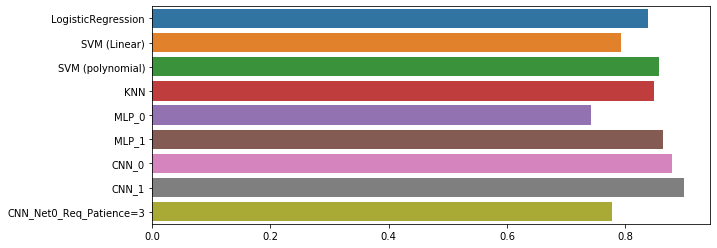

In [6]:
acc = [l.accuracy for l in loggers.values()]
plt.figure(figsize=(10, 4))
sns.barplot(y=list(models.keys()), x=acc);

## Precision and recall
The following code creates a bar plot showing the precision/recall for each class and model loaded:

/mnt/8494BC6E94BC63F8/4Semester/ML/Repo_Amir_Exam_Part1/Exam assignments 3/code/metrics.py:50: RuntimeWarning: invalid value encountered in double_scalars
  precision = [diagonals[i] / rows[i] for i in range(n[0])]


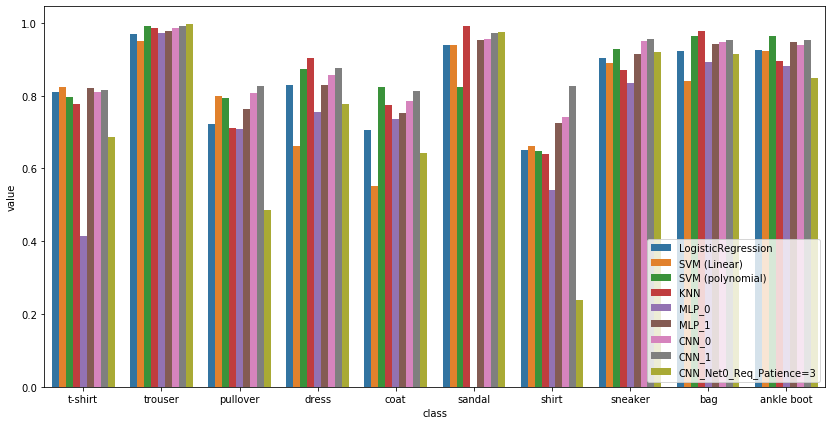

In [7]:
ps = {k: v.precision for k, v in loggers.items()}
ps = {'class': classes, **ps}

df = pd.DataFrame(ps)
df = df.melt(id_vars='class')

plt.figure(figsize=(14, 7))
sns.barplot(x='class', y='value', hue='variable', data=df)
plt.legend(loc='lower right');

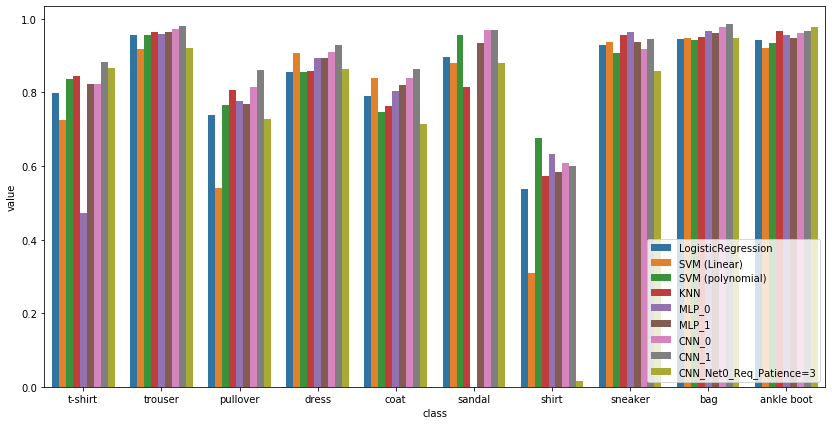

In [8]:
ps = {k: v.recall for k, v in loggers.items()}
ps = {'class': classes, **ps}

df = pd.DataFrame(ps)
df = df.melt(id_vars='class')

plt.figure(figsize=(14, 7))
sns.barplot(x='class', y='value', hue='variable', data=df)
plt.legend(loc='lower right');

# Image samples
The following is code to generate sample image grids. This is very useful for visualising samples together with the prediction and label:

In [9]:
X_train, y_train = load_mnist('data/FashionMNIST/raw', kind='train')
X_test, y_test = load_mnist('data/FashionMNIST/raw', kind='t10k')

def show_samples(X, y, num, prediction=None, sort=True, cols=32, width_mul=1):
    if prediction is None:
        height_mul = 1
    else:
        height_mul = 2
        
    if sort: 
        idx = np.argsort(y[:num])
        X = X[idx]
        if prediction is not None:
            prediction = prediction[idx]
    fig, ax = plt.subplots(nrows=num//cols, ncols=cols, figsize=(width_mul*cols, height_mul*num//cols))
    for i in range(num):
        ax[i//cols, i%cols].axis('off')
        ax[i//cols, i%cols].imshow(X[i].reshape((28, 28)), cmap='gray')
        if prediction is not None:
            ax[i//cols, i%cols].set_title(f'{classes[prediction[i]]}/{classes[y[i]]}')

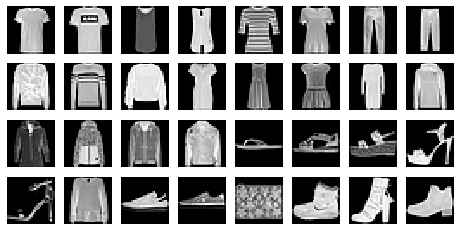

In [10]:
show_samples(X_train, y_train, 32, cols=8)

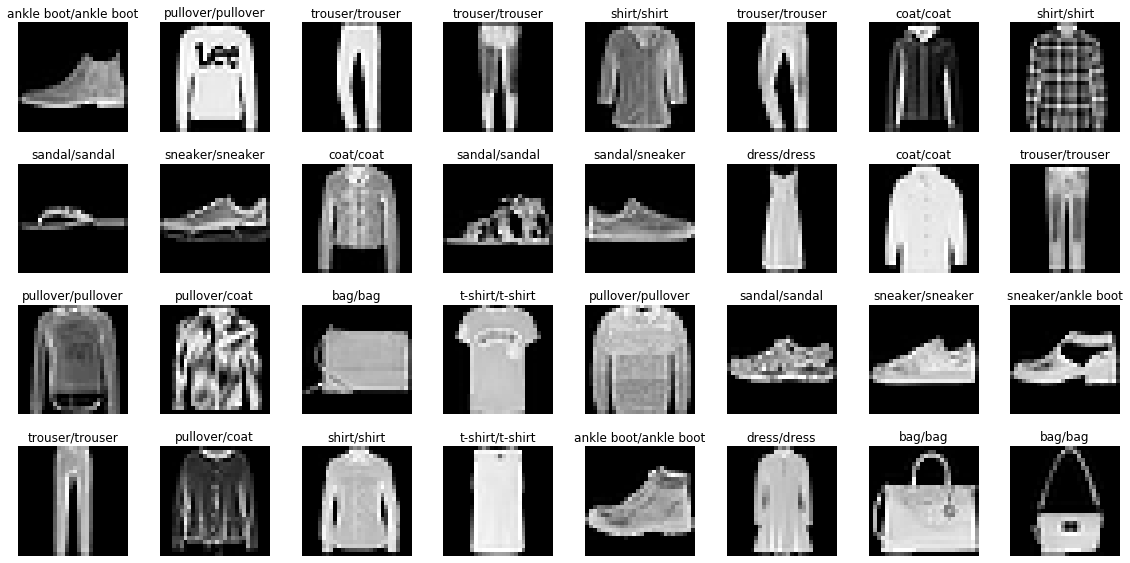

In [11]:
p = models['LogisticRegression'].predict(X_test)

X = X_test
p = p
y = y_test

show_samples(X, y, 32, prediction=p, cols=8, sort=False, width_mul=2)
plt.tight_layout()
plt.savefig('img/result_LogisticRegression.pdf')

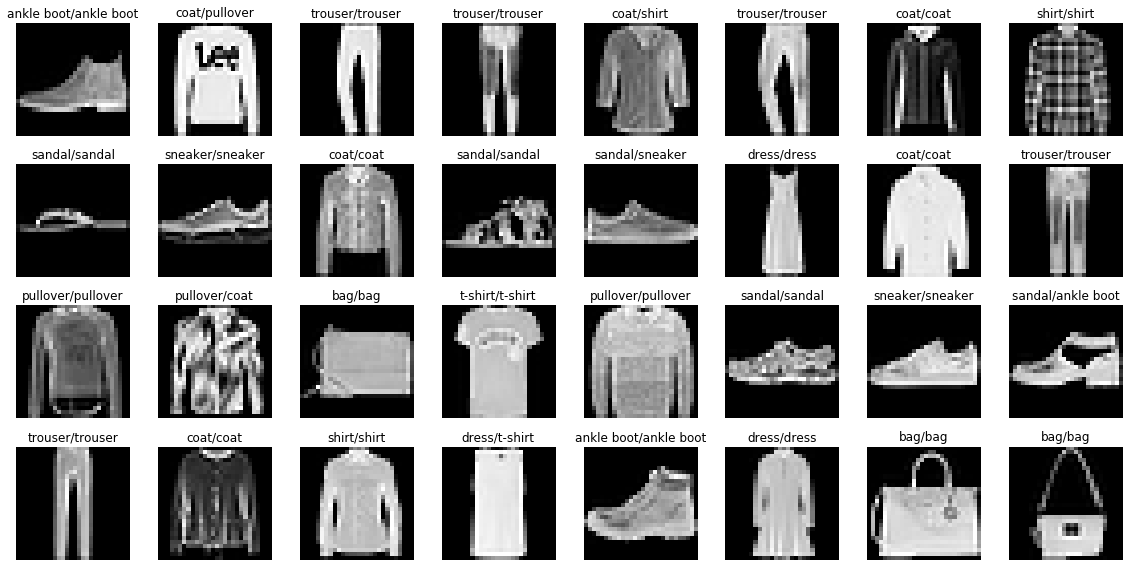

In [12]:
p = models['SVM (Linear)'].predict(X_test)

X = X_test
p = p
y = y_test

show_samples(X, y, 32, prediction=p, cols=8, sort=False, width_mul=2)
plt.tight_layout()
plt.savefig('img/result_SVM(Linear).pdf')

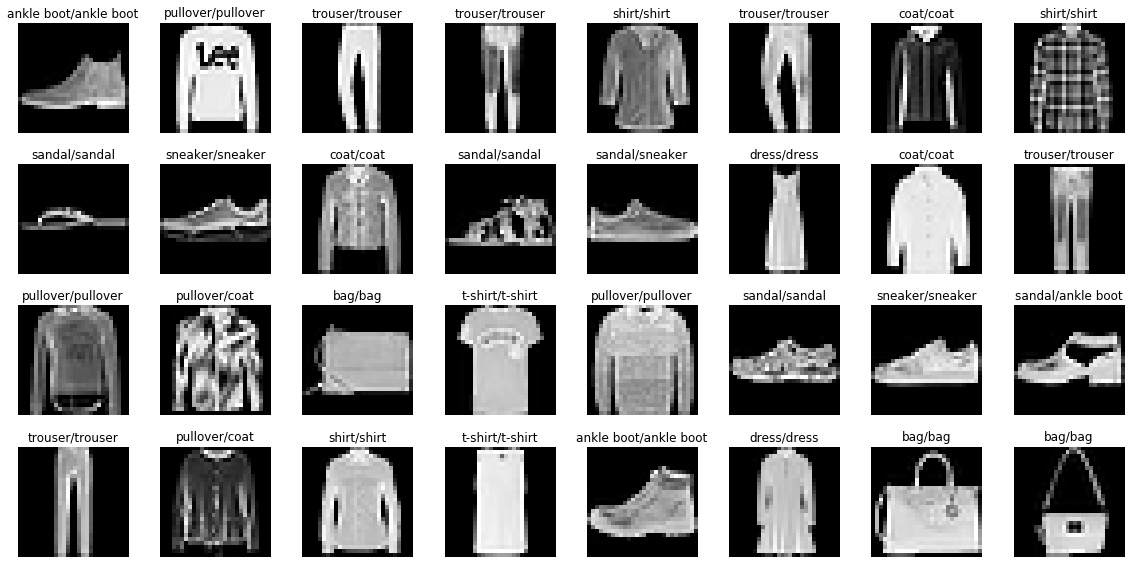

In [13]:
p = models['SVM (polynomial)'].predict(X_test)

X = X_test
p = p
y = y_test

show_samples(X, y, 32, prediction=p, cols=8, sort=False, width_mul=2)
plt.tight_layout()
plt.savefig('img/result_SVM.pdf')

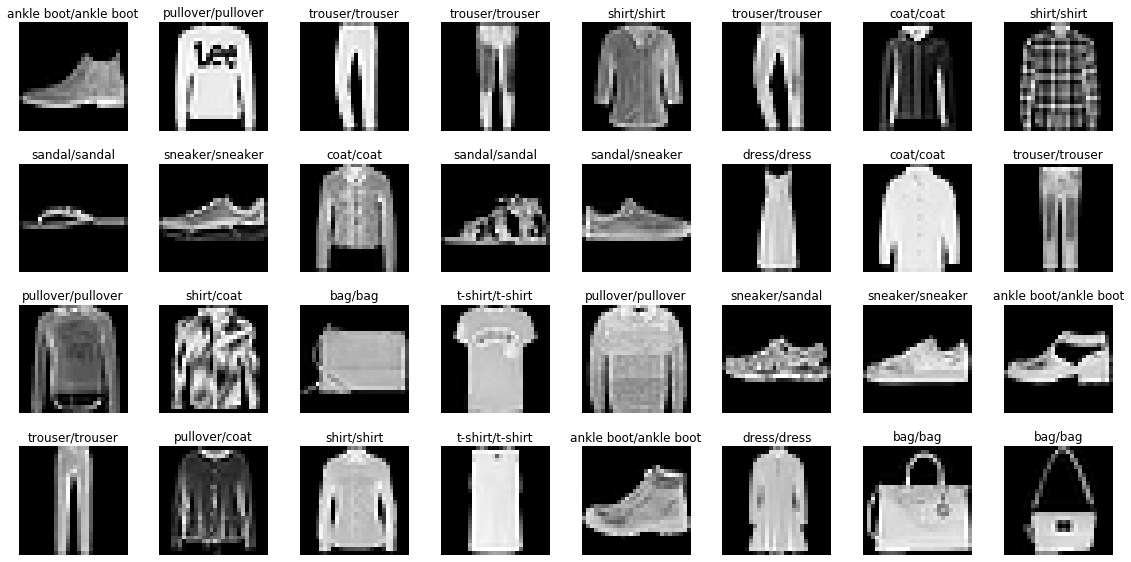

In [14]:
p = models['KNN'].predict(X_test)

X = X_test
p = p
y = y_test

show_samples(X, y, 32, prediction=p, cols=8, sort=False, width_mul=2)
plt.tight_layout()
plt.savefig('img/result_KNN.pdf')

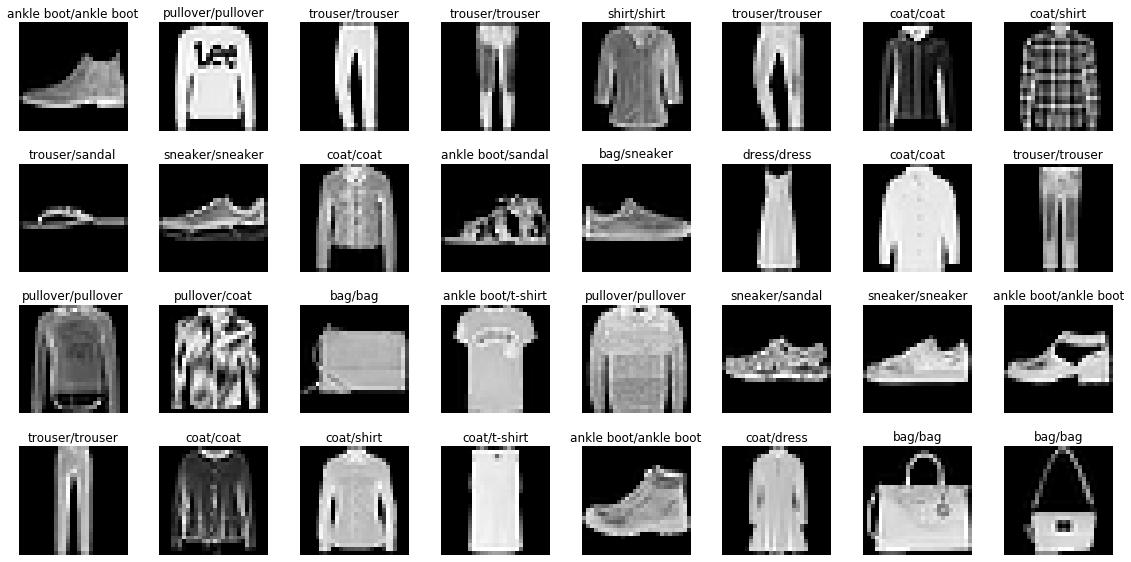

In [15]:
p = models['MLP_0'].predict(torch.from_numpy(X_test.astype("float16")).float())

X = X_test
p = p
y = y_test

show_samples(X, y, 32, prediction=p, cols=8, sort=False, width_mul=2)
plt.tight_layout()
plt.savefig('img/result_MLP_0.pdf')

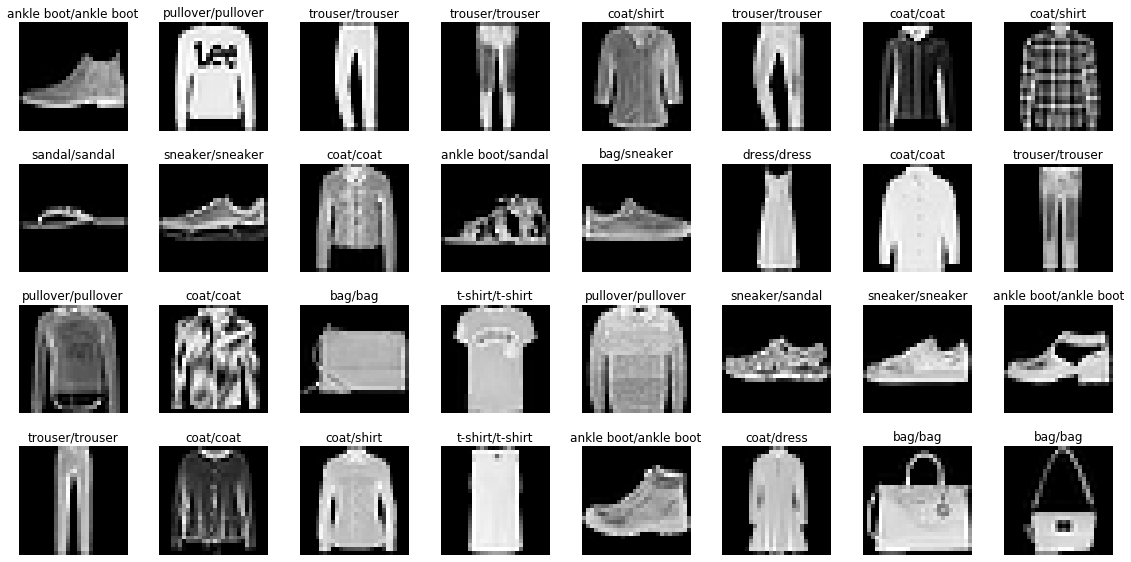

In [16]:
p = models['MLP_1'].predict(torch.from_numpy(X_test.astype("float16")).float())

X = X_test
p = p
y = y_test

show_samples(X, y, 32, prediction=p, cols=8, sort=False, width_mul=2)
plt.tight_layout()
plt.savefig('img/result_MLP_1.pdf')